In [1]:
!pip install -q pytorch-warmup-scheduler

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [3]:
from pytorch_warmup_scheduler import WarmupScheduler

In [4]:
model = nn.Conv2d(3, 10, 3)

In [5]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler1 = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                  milestones=[100, 150],
                                                  gamma=0.1)
scheduler2 = WarmupScheduler(optimizer, warmup_epoch=5)

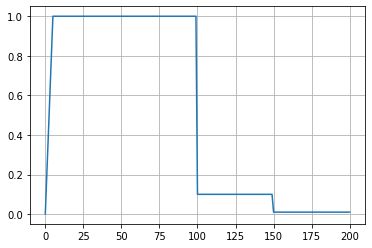

In [6]:
lr = []
lr.append(optimizer.param_groups[0]['lr'])
for epoch in range(200):
    optimizer.zero_grad()
    optimizer.step()
    scheduler1.step()
    scheduler2.step()
    lr.append(scheduler2.get_last_lr()[0])

plt.plot(lr)
plt.grid()
plt.show()

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler1 = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                        100,
                                                        eta_min=0.001)
scheduler2 = WarmupScheduler(optimizer, warmup_epoch=5)

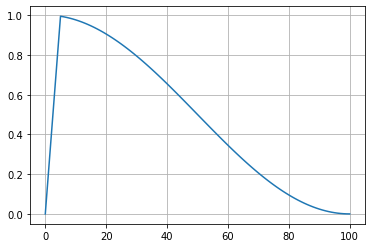

In [8]:
lr = []
lr.append(optimizer.param_groups[0]['lr'])
for epoch in range(100):
    optimizer.zero_grad()
    optimizer.step()
    scheduler1.step()
    scheduler2.step()
    lr.append(scheduler2.get_last_lr()[0])

plt.plot(lr)
plt.grid()
plt.show()

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=1)
scheduler1 = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                        100,
                                                        eta_min=0.001)
scheduler2 = WarmupScheduler(optimizer, warmup_epoch=5, initial_lr_factor=0.1)

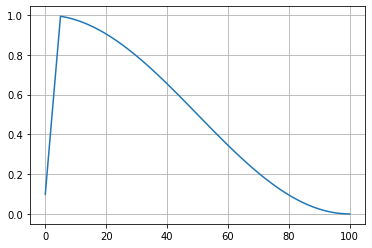

In [10]:
lr = []
lr.append(optimizer.param_groups[0]['lr'])
for epoch in range(100):
    optimizer.zero_grad()
    optimizer.step()
    scheduler1.step()
    scheduler2.step()
    lr.append(scheduler2.get_last_lr()[0])

plt.plot(lr)
plt.grid()
plt.show()